In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ast import literal_eval

# Set basic style
plt.style.use('default')

# Read the data
df = pd.read_csv('../data/modern_english_books.csv')

In [3]:
print("Dataset Overview:")
print(f"Total books: {len(df)}")
print(f"Date range: {df['first_publish_year'].min()} - {df['first_publish_year'].max()}")
print("\nColumns in dataset:")
print(df.columns.tolist())

Dataset Overview:
Total books: 10000
Date range: 1900 - 2022

Columns in dataset:
['title', 'author_name', 'first_publish_year', 'subject', 'cover_i', 'subject_count', 'decade']



Books published per decade:
decade
1900     119
1910     103
1920     141
1930     155
1940     175
1950     225
1960     428
1970     710
1980     934
1990    1166
2000    1574
2010    2837
2020    1433
Name: count, dtype: int64


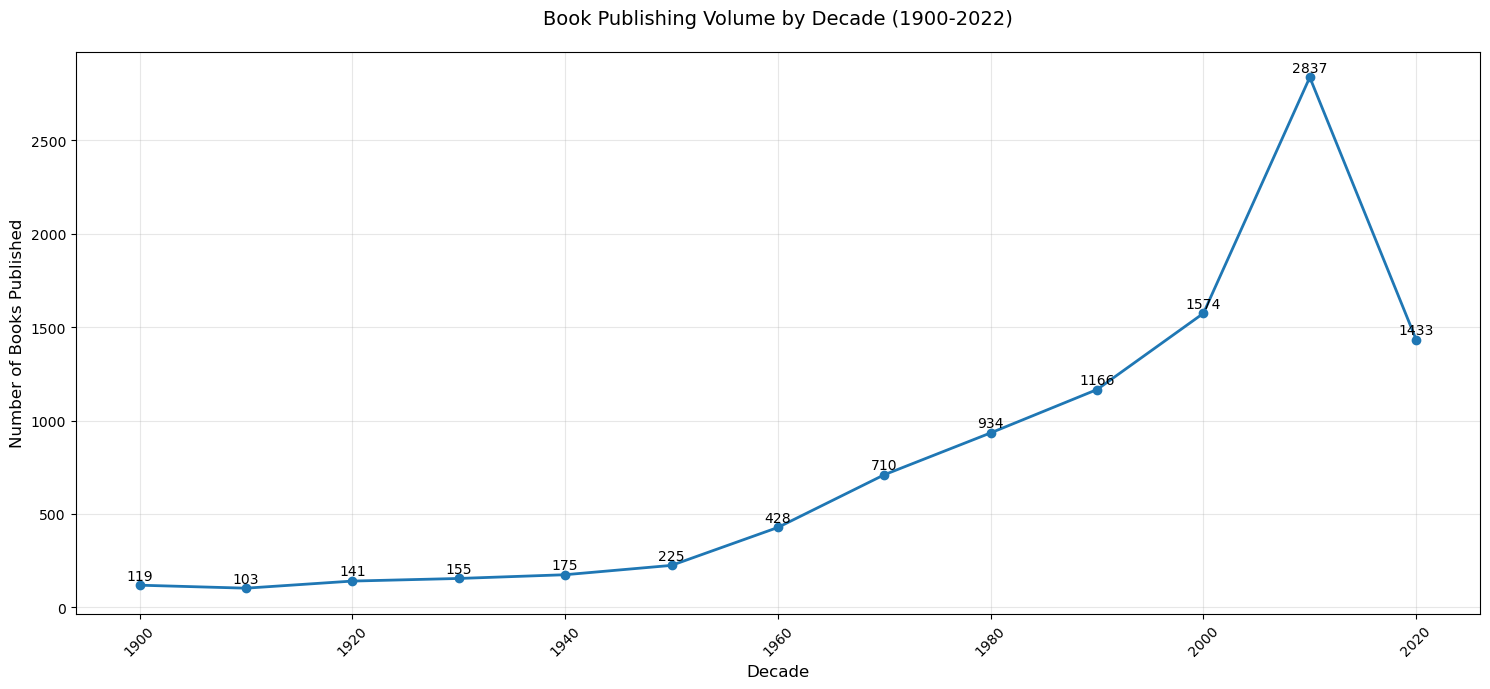

In [4]:
def analyze_publication_trends():
    # Create decade bins
    df['decade'] = (df['first_publish_year'] // 10) * 10
    
    # Count books per decade
    decade_counts = df['decade'].value_counts().sort_index()
    
    # Create figure
    plt.figure(figsize=(15, 7))
    
    # Plot decade trends
    plt.plot(decade_counts.index, decade_counts.values, marker='o', linewidth=2)
    
    # Customize plot
    plt.title('Book Publishing Volume by Decade (1900-2022)', pad=20, fontsize=14)
    plt.xlabel('Decade', fontsize=12)
    plt.ylabel('Number of Books Published', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # Add value labels
    for x, y in zip(decade_counts.index, decade_counts.values):
        plt.text(x, y + 30, str(y), ha='center')
    
    # Rotate x-axis labels
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    return decade_counts

decade_counts = analyze_publication_trends()
print("\nBooks published per decade:")
print(decade_counts.sort_index())


Top genres by decade:

1900s:
- United States: 11
- Bills, Private: 10
- Claims: 10
- Private Bills: 10
- United States. Congress: 10

1910s:
- History: 7
- Catalogs: 6
- World War, 1914-1918: 5
- Fiction: 4
- Women: 4

1920s:
- History: 5
- Ornamental Plants: 4
- Nursery stock: 4
- Seeds: 4
- Flowers: 4

1930s:
- History: 14
- Bibliography: 6
- Catalogs: 5
- Prices: 4
- Biography: 4

1940s:
- History: 11
- World War, 1939-1945: 5
- Description and travel: 3
- Politics and government: 3
- Economic conditions: 3

1950s:
- History: 13
- Biography: 5
- Politics and government: 5
- Fiction: 4
- Congresses: 4

1960s:
- History: 21
- Congresses: 12
- Juvenile literature: 9
- Fiction: 7
- Foreign relations: 6

1970s:
- History: 40
- Congresses: 26
- Fiction: 16
- Politics and government: 13
- Law and legislation: 12

1980s:
- History: 51
- Congresses: 32
- Biography: 28
- Fiction: 21
- Juvenile literature: 16

1990s:
- History: 74
- Congresses: 50
- Fiction: 44
- Biography: 24
- Fiction, gen

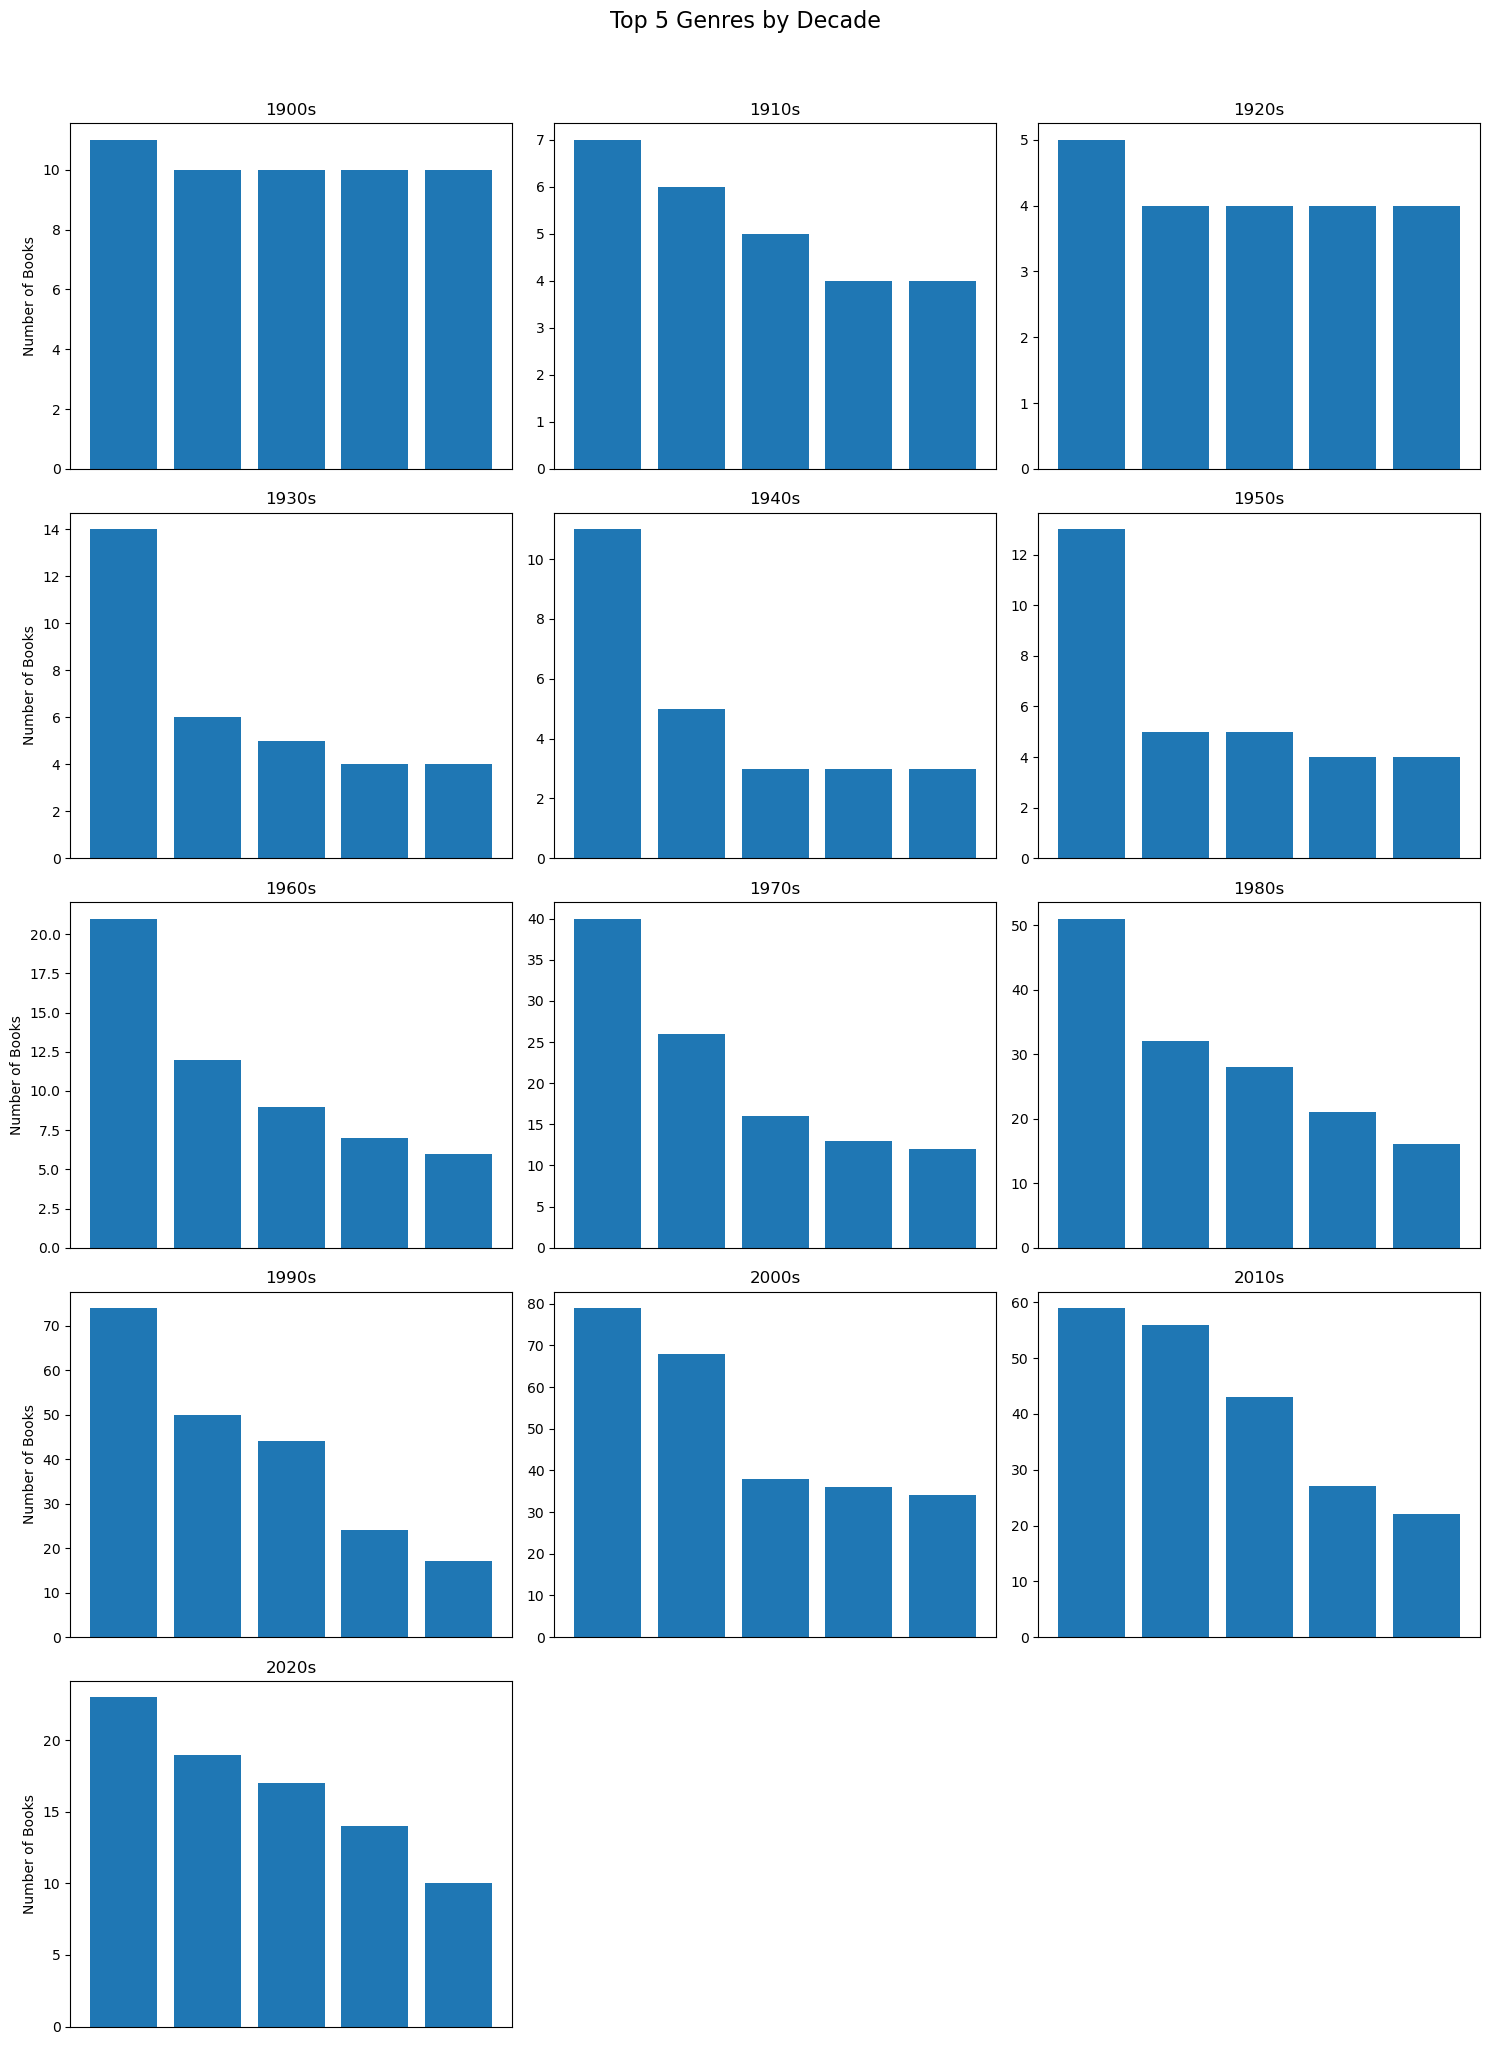

In [7]:
def analyze_genre_dominance():
    # Convert string representation of lists to actual lists
    df['subject_list'] = df['subject'].apply(lambda x: literal_eval(x) if isinstance(x, str) else [])
    
    # Create decade bins if not already created
    if 'decade' not in df.columns:
        df['decade'] = (df['first_publish_year'] // 10) * 10
    
    # Get top genres for each decade
    decade_genres = {}
    
    for decade in sorted(df['decade'].unique()):
        # Get books from this decade
        decade_books = df[df['decade'] == decade]
        
        # Flatten all subjects from this decade
        all_subjects = [subj for sublist in decade_books['subject_list'] for subj in sublist]
        
        # Get top 5 subjects
        top_subjects = pd.Series(all_subjects).value_counts().head(5)
        
        decade_genres[decade] = top_subjects
    
    # Create a visualization with adjusted grid size
    decades = sorted(decade_genres.keys())
    n_decades = len(decades)
    
    # Calculate grid dimensions
    n_cols = 3
    n_rows = (n_decades + n_cols - 1) // n_cols  # Ceiling division
    
    plt.figure(figsize=(15, 4*n_rows))
    
    # Plot top genres for each decade
    for i, decade in enumerate(decades):
        top_genres = decade_genres[decade]
        plt.subplot(n_rows, n_cols, i+1)
        bars = plt.bar(range(len(top_genres)), top_genres.values)
        plt.title(f'{decade}s')
        plt.xticks([])  # Hide x labels as they would be too crowded
        if i % n_cols == 0:  # Add y-label only for leftmost plots
            plt.ylabel('Number of Books')
    
    plt.suptitle('Top 5 Genres by Decade', fontsize=16, y=1.02)
    plt.tight_layout()
    
    return decade_genres

decade_genres = analyze_genre_dominance()

# Print detailed genre breakdown
print("\nTop genres by decade:")
for decade in sorted(decade_genres.keys()):
    print(f"\n{decade}s:")
    for genre, count in decade_genres[decade].items():
        print(f"- {genre}: {count}")

In [8]:
# Calculate growth rates between decades
def analyze_growth_trends(decade_counts):
    decade_counts_sorted = decade_counts.sort_index()
    
    print("Publication Growth Analysis:")
    print("\nBooks per decade:")
    for decade, count in decade_counts_sorted.items():
        print(f"{decade}s: {count:,} books")
    
    print("\nDecade-over-decade growth:")
    previous_count = None
    for decade, count in decade_counts_sorted.items():
        if previous_count is not None:
            growth = ((count - previous_count) / previous_count) * 100
            print(f"{decade}s: {growth:,.1f}% change")
        previous_count = count

analyze_growth_trends(decade_counts)

Publication Growth Analysis:

Books per decade:
1900s: 119 books
1910s: 103 books
1920s: 141 books
1930s: 155 books
1940s: 175 books
1950s: 225 books
1960s: 428 books
1970s: 710 books
1980s: 934 books
1990s: 1,166 books
2000s: 1,574 books
2010s: 2,837 books
2020s: 1,433 books

Decade-over-decade growth:
1910s: -13.4% change
1920s: 36.9% change
1930s: 9.9% change
1940s: 12.9% change
1950s: 28.6% change
1960s: 90.2% change
1970s: 65.9% change
1980s: 31.5% change
1990s: 24.8% change
2000s: 35.0% change
2010s: 80.2% change
2020s: -49.5% change


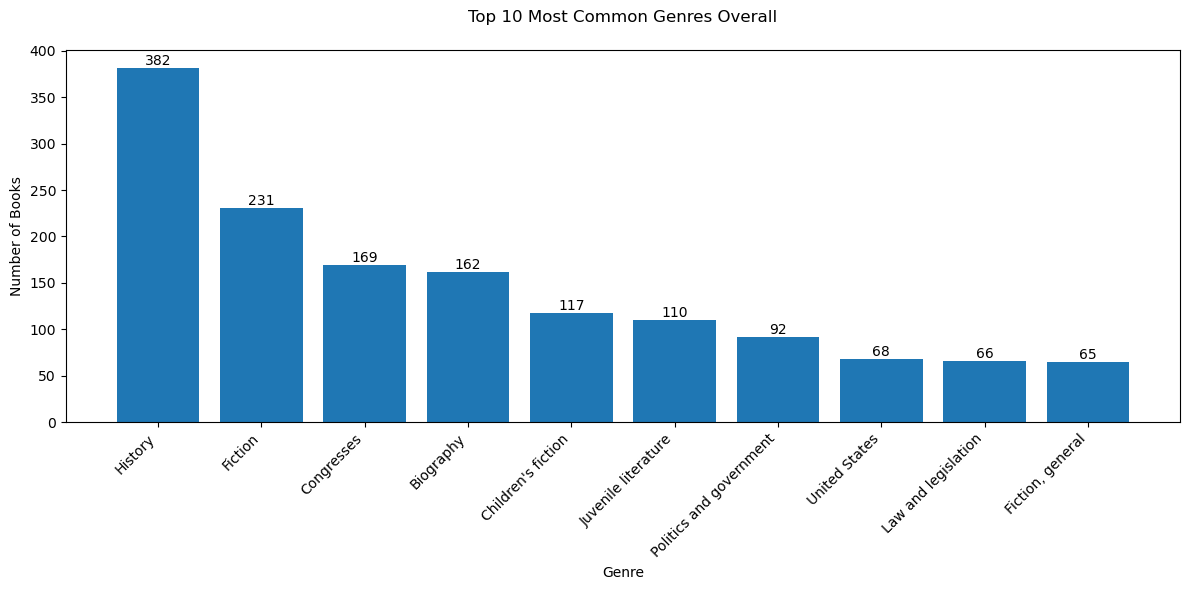

In [9]:
# Analyze overall most common genres
all_subjects = []
for subjects in df['subject_list']:
    all_subjects.extend(subjects)

top_genres_overall = pd.Series(all_subjects).value_counts().head(10)

plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(top_genres_overall)), top_genres_overall.values)
plt.title('Top 10 Most Common Genres Overall', pad=20)
plt.xlabel('Genre')
plt.ylabel('Number of Books')

# Rotate x-axis labels for better readability
plt.xticks(range(len(top_genres_overall)), top_genres_overall.index, rotation=45, ha='right')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

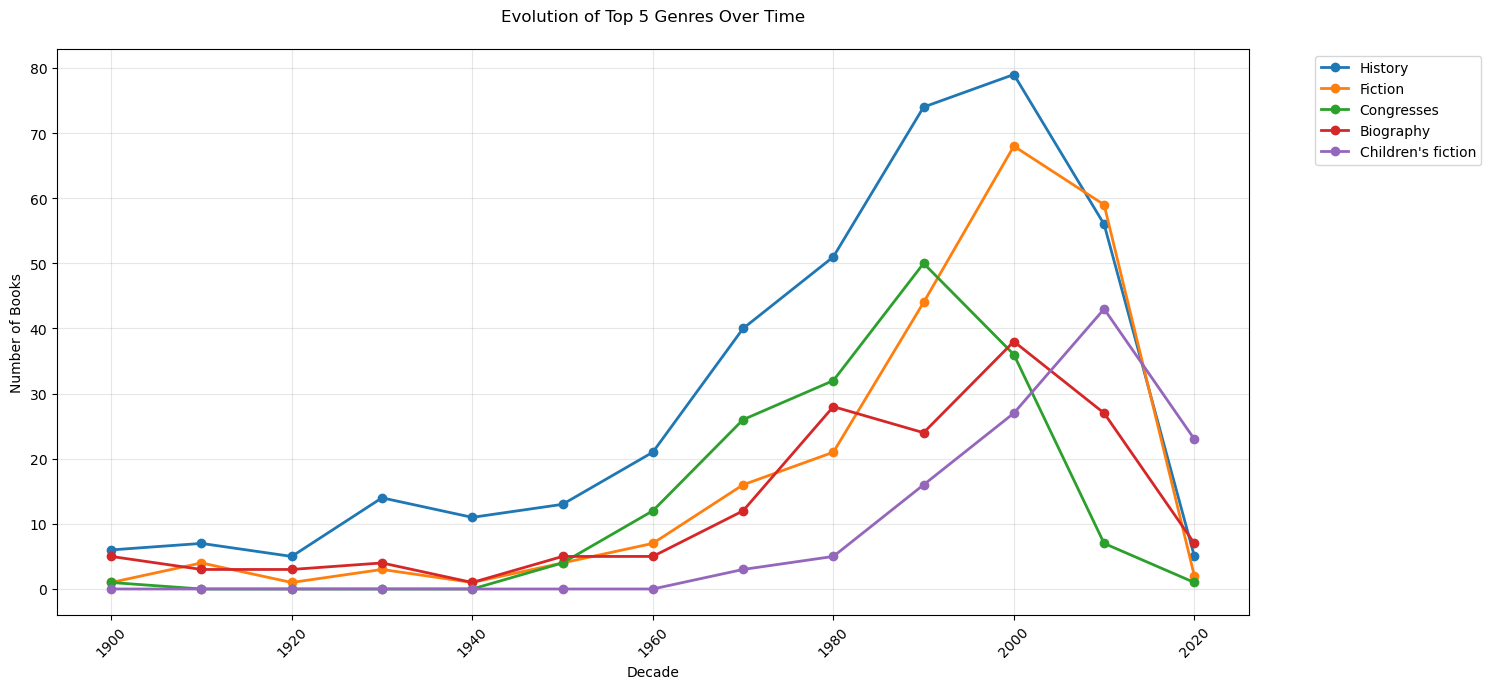

In [10]:
# Select top 5 genres overall and plot their evolution
top_5_genres = top_genres_overall.head().index

# Create a dataframe for genre evolution
genre_evolution = pd.DataFrame(index=sorted(df['decade'].unique()))

for genre in top_5_genres:
    counts_by_decade = []
    for decade in genre_evolution.index:
        decade_books = df[df['decade'] == decade]
        count = sum(1 for subjects in decade_books['subject_list'] if genre in subjects)
        counts_by_decade.append(count)
    genre_evolution[genre] = counts_by_decade

# Plot evolution
plt.figure(figsize=(15, 7))
for genre in top_5_genres:
    plt.plot(genre_evolution.index, genre_evolution[genre], marker='o', label=genre, linewidth=2)

plt.title('Evolution of Top 5 Genres Over Time', pad=20)
plt.xlabel('Decade')
plt.ylabel('Number of Books')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
def prepare_data_for_tableau():
    # 1. Publication Timeline Data
    timeline_df = pd.DataFrame({
        'decade': decade_counts.index,
        'number_of_books': decade_counts.values
    })
    
    # 2. Genre by Decade Data
    genre_decades = []
    for decade, genres in decade_genres.items():
        for genre, count in genres.items():
            genre_decades.append({
                'decade': decade,
                'genre': genre,
                'count': count
            })
    genre_decade_df = pd.DataFrame(genre_decades)
    
    # Save to CSV files
    timeline_df.to_csv('../data/tableau_timeline.csv', index=False)
    genre_decade_df.to_csv('../data/tableau_genres.csv', index=False)
    
    print("Files saved:")
    print("1. tableau_timeline.csv")
    print("2. tableau_genres.csv")
    
    # Display preview of the data
    print("\nTimeline Data Preview:")
    print(timeline_df.head())
    print("\nGenre Data Preview:")
    print(genre_decade_df.head())
    
    return timeline_df, genre_decade_df

# Execute the function
timeline_data, genre_data = prepare_data_for_tableau()

Files saved:
1. tableau_timeline.csv
2. tableau_genres.csv

Timeline Data Preview:
   decade  number_of_books
0    1900              119
1    1910              103
2    1920              141
3    1930              155
4    1940              175

Genre Data Preview:
   decade                    genre  count
0    1900            United States     11
1    1900           Bills, Private     10
2    1900                   Claims     10
3    1900            Private Bills     10
4    1900  United States. Congress     10


In [1]:
def enhanced_genre_cleaning(df):
    # Define our comprehensive genre mapping
    GENRE_MAPPING = {
        # Youth Literature
        'juvenile fiction': "Children's Literature",
        'children\'s fiction': "Children's Literature",
        'juvenile literature': "Children's Literature",
        'picture books': "Children's Literature",
        'middle grade': "Children's Literature",
        
        # Young Adult
        'young adult fiction': "Young Adult Literature",
        'ya fiction': "Young Adult Literature",
        'teen fiction': "Young Adult Literature",
        'teen literature': "Young Adult Literature",
        
        # General Fiction
        'fiction': "Fiction",
        'novels': "Fiction",
        'short stories': "Fiction",
        
        # Remove format categories
        'congresses': None,
        'proceedings': None,
        'dissertations': None
    }
    
    # Format categories to exclude
    FORMAT_CATEGORIES = [
        'congresses',
        'proceedings',
        'periodicals',
        'dissertations',
        'papers',
        'reports'
    ]
    
    def clean_subject_list(subjects):
        if isinstance(subjects, str):
            try:
                subject_list = literal_eval(subjects)
            except:
                return []
        else:
            return []
            
        cleaned = []
        for subject in subject_list:
            subject_lower = subject.lower()
            
            # Skip format categories
            if any(format_cat in subject_lower for format_cat in FORMAT_CATEGORIES):
                continue
                
            # Apply mapping or keep original
            mapped_subject = GENRE_MAPPING.get(subject_lower, subject)
            if mapped_subject:
                cleaned.append(mapped_subject)
                
        return list(set(cleaned))  # Remove duplicates
    
    df['cleaned_genres'] = df['subject'].apply(clean_subject_list)
    return df

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ast import literal_eval

In [6]:
def analyze_publication_trends_with_events():
    # Create decade bins (from your existing code)
    df['decade'] = (df['first_publish_year'] // 10) * 10
    
    # Count books per decade
    decade_counts = df['decade'].value_counts().sort_index()
    
    # Create figure
    plt.figure(figsize=(15, 8))
    
    # Plot decade trends
    plt.plot(decade_counts.index, decade_counts.values, marker='o', linewidth=2)
    
    # Historical events to annotate
    events = {
        1910: ('WWI', 'Start of World War I'),
        1929: ('Depression', 'Great Depression'),
        1939: ('WWII', 'Start of World War II'),
        1950: ('TV Era', 'Television becomes widespread'),
        1995: ('Internet', 'Internet becomes mainstream'),
        2007: ('Kindle', 'Amazon Kindle released'),
        2020: ('COVID', 'COVID-19 Pandemic')
    }
    
    # Add event annotations
    for year, (label, desc) in events.items():
        nearest_decade = (year // 10) * 10
        if nearest_decade in decade_counts.index:
            count = decade_counts[nearest_decade]
            plt.annotate(label, 
                        xy=(nearest_decade, count),
                        xytext=(10, 10),
                        textcoords='offset points',
                        ha='left',
                        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                        arrowprops=dict(arrowstyle='->'))
    
    # Customize plot
    plt.title('Book Publishing Volume by Decade (1900-2022)\nwith Historical Events', pad=20, fontsize=14)
    plt.xlabel('Decade', fontsize=12)
    plt.ylabel('Number of Books Published', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # Add value labels
    for x, y in zip(decade_counts.index, decade_counts.values):
        plt.text(x, y + 30, str(y), ha='center')
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    return decade_counts

In [9]:
import os
print("Current working directory:", os.getcwd())

Current working directory: /Users/christiemegill/book_cover_analysis/notebooks


In [10]:
print("\nFiles in current directory:")
print(os.listdir())


Files in current directory:
['publishing_evolution_analysis.ipynb', 'book_analysis.ipynb']


In [11]:
# Go up one level and into data directory
df = pd.read_csv('../data/modern_english_books.csv')
print("Data loaded successfully")
print(f"Number of rows: {len(df)}")
print("\nColumns in dataset:")
print(df.columns.tolist())

Data loaded successfully
Number of rows: 10000

Columns in dataset:
['title', 'author_name', 'first_publish_year', 'subject', 'cover_i', 'subject_count', 'decade']



Publishing Volume by Decade:
1900s: 119 books
1910s: 103 books
1920s: 141 books
1930s: 155 books
1940s: 175 books
1950s: 225 books
1960s: 428 books
1970s: 710 books
1980s: 934 books
1990s: 1,166 books
2000s: 1,574 books
2010s: 2,837 books
2020s: 1,433 books


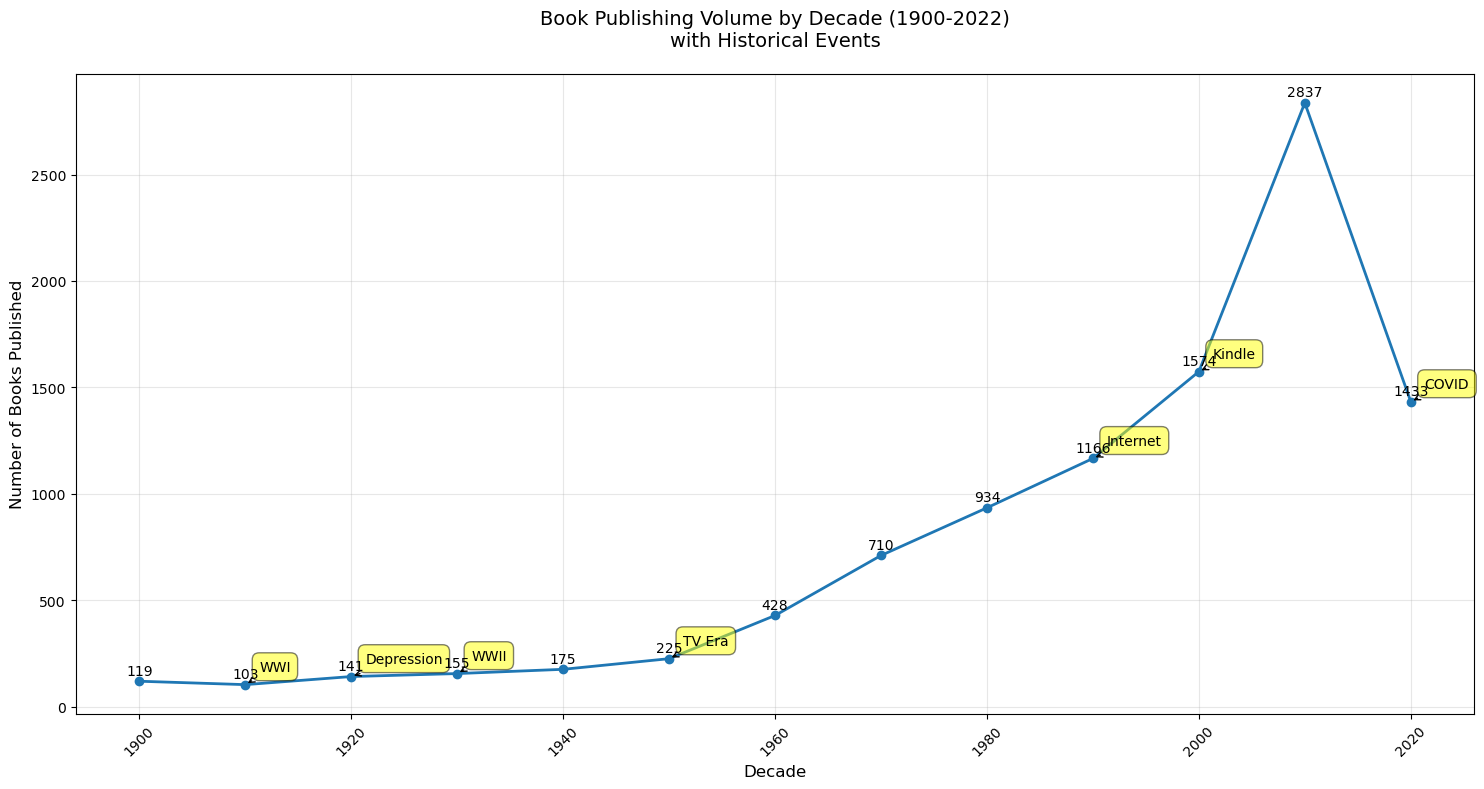

In [12]:
def analyze_publication_trends_with_events():
    # Create decade bins
    df['decade'] = (df['first_publish_year'] // 10) * 10
    
    # Count books per decade
    decade_counts = df['decade'].value_counts().sort_index()
    
    # Create figure
    plt.figure(figsize=(15, 8))
    
    # Plot decade trends
    plt.plot(decade_counts.index, decade_counts.values, marker='o', linewidth=2)
    
    # Historical events to annotate
    events = {
        1910: ('WWI', 'Start of World War I'),
        1929: ('Depression', 'Great Depression'),
        1939: ('WWII', 'Start of World War II'),
        1950: ('TV Era', 'Television becomes widespread'),
        1995: ('Internet', 'Internet becomes mainstream'),
        2007: ('Kindle', 'Amazon Kindle released'),
        2020: ('COVID', 'COVID-19 Pandemic')
    }
    
    # Add event annotations
    for year, (label, desc) in events.items():
        nearest_decade = (year // 10) * 10
        if nearest_decade in decade_counts.index:
            count = decade_counts[nearest_decade]
            plt.annotate(label, 
                        xy=(nearest_decade, count),
                        xytext=(10, 10),
                        textcoords='offset points',
                        ha='left',
                        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                        arrowprops=dict(arrowstyle='->'))
    
    # Customize plot
    plt.title('Book Publishing Volume by Decade (1900-2022)\nwith Historical Events', pad=20, fontsize=14)
    plt.xlabel('Decade', fontsize=12)
    plt.ylabel('Number of Books Published', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # Add value labels
    for x, y in zip(decade_counts.index, decade_counts.values):
        plt.text(x, y + 30, str(y), ha='center')
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    return decade_counts

# Run the analysis
volume_trends = analyze_publication_trends_with_events()

# Display summary statistics
print("\nPublishing Volume by Decade:")
for decade in sorted(volume_trends.index):
    print(f"{decade}s: {volume_trends[decade]:,} books")


Top Genres by Decade:

1900s:
History: 6 books
Fiction: 1 books
Congresses: 1 books
Biography: 5 books
Children's fiction: 0 books
Juvenile literature: 0 books
Politics and government: 0 books
United States: 11 books

1910s:
History: 7 books
Fiction: 4 books
Congresses: 0 books
Biography: 3 books
Children's fiction: 0 books
Juvenile literature: 1 books
Politics and government: 1 books
United States: 3 books

1920s:
History: 5 books
Fiction: 1 books
Congresses: 0 books
Biography: 3 books
Children's fiction: 0 books
Juvenile literature: 2 books
Politics and government: 0 books
United States: 3 books

1930s:
History: 14 books
Fiction: 3 books
Congresses: 0 books
Biography: 4 books
Children's fiction: 0 books
Juvenile literature: 1 books
Politics and government: 3 books
United States: 1 books

1940s:
History: 11 books
Fiction: 1 books
Congresses: 0 books
Biography: 1 books
Children's fiction: 0 books
Juvenile literature: 1 books
Politics and government: 3 books
United States: 0 books

195

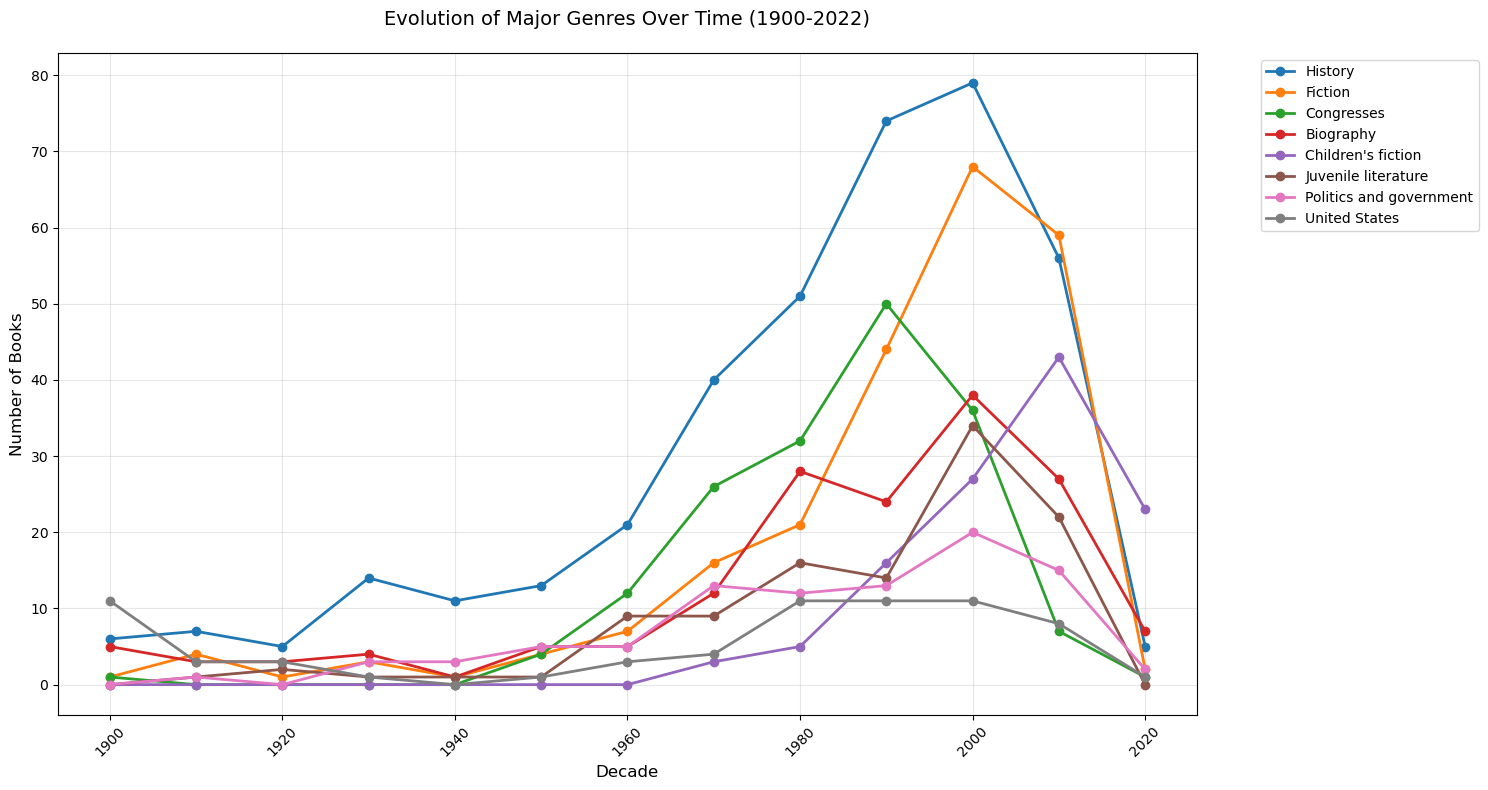

In [13]:
def analyze_genre_evolution():
    # Ensure we have cleaned genres
    if 'cleaned_genres' not in df.columns:
        # Convert string representation of lists to actual lists
        df['cleaned_genres'] = df['subject'].apply(lambda x: literal_eval(x) if isinstance(x, str) else [])
    
    # Get top genres overall for focusing our analysis
    all_genres = []
    for genres in df['cleaned_genres']:
        all_genres.extend(genres)
    
    top_genres = pd.Series(all_genres).value_counts().head(8).index.tolist()
    
    # Create a DataFrame for genre evolution
    genre_evolution = pd.DataFrame(index=sorted(df['decade'].unique()))
    
    for genre in top_genres:
        counts_by_decade = []
        for decade in genre_evolution.index:
            decade_books = df[df['decade'] == decade]
            count = sum(1 for genres in decade_books['cleaned_genres'] if genre in genres)
            counts_by_decade.append(count)
        genre_evolution[genre] = counts_by_decade
    
    # Create visualization
    plt.figure(figsize=(15, 8))
    
    # Plot each genre
    for genre in top_genres:
        plt.plot(genre_evolution.index, genre_evolution[genre], 
                marker='o', label=genre, linewidth=2)
    
    plt.title('Evolution of Major Genres Over Time (1900-2022)', pad=20, fontsize=14)
    plt.xlabel('Decade', fontsize=12)
    plt.ylabel('Number of Books', fontsize=12)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    return genre_evolution

# Run the genre analysis
genre_trends = analyze_genre_evolution()

# Print summary of genre trends
print("\nTop Genres by Decade:")
for decade in sorted(genre_trends.index):
    print(f"\n{decade}s:")
    for genre in genre_trends.columns:
        count = genre_trends.loc[decade, genre]
        print(f"{genre}: {count:,} books")

In [14]:

# Create decade publishing data CSV
decade_volumes = pd.DataFrame(volume_trends).reset_index()
decade_volumes.columns = ['Decade', 'Number_of_Books']
decade_volumes.to_csv('../data/decade_volumes.csv', index=False)

# Create historical events data CSV
events_data = pd.DataFrame([
    {'Year': 1910, 'Event': 'Start of World War I', 'Label': 'WWI'},
    {'Year': 1929, 'Event': 'Great Depression', 'Label': 'Depression'},
    {'Year': 1939, 'Event': 'Start of World War II', 'Label': 'WWII'},
    {'Year': 1950, 'Event': 'Television becomes widespread', 'Label': 'TV Era'},
    {'Year': 1995, 'Event': 'Internet becomes mainstream', 'Label': 'Internet'},
    {'Year': 2007, 'Event': 'Amazon Kindle released', 'Label': 'Kindle'},
    {'Year': 2020, 'Event': 'COVID-19 Pandemic', 'Label': 'COVID'}
])
events_data['Decade'] = (events_data['Year'] // 10) * 10
events_data.to_csv('../data/historical_events.csv', index=False)